<a href="https://colab.research.google.com/github/abdalrhmangamal12/deep-learning/blob/main/Fashion-MNIST%20Clothing%20%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from keras import datasets
import matplotlib.pyplot as plt


In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

In [ ]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

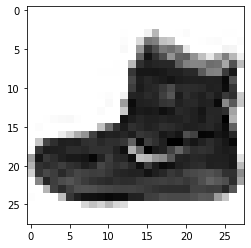

In [ ]:
plt.imshow(x_train[0],cmap='binary')

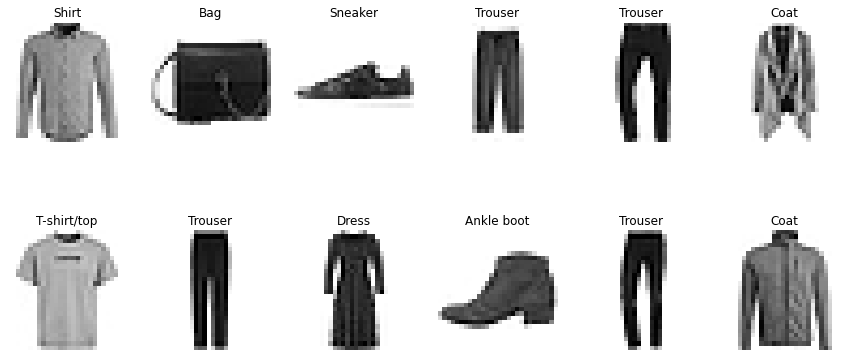

In [ ]:
fig=plt.figure(figsize=(15,7))
rows,colm=2,6
for i in range(12):
  index=np.random.choice(6000)
  fig.add_subplot(rows,colm,i+1)
  plt.imshow(x_train[index],cmap='binary')
  plt.axis('off')
  plt.title(class_names[y_train[index]])
plt.show()

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
#split date by 20% valid and 80% test and normalize data 
x_valid=x_train[0:12000]/255
y_valid=y_train[0:12000]
x_ntrain=x_train[12000:]/255
y_ntrain=y_train[12000:]
x_test=x_test/255

In [ ]:
y_ntrain_hot= keras.utils.to_categorical(y_ntrain,num_classes=10)
y_valid_hot=keras.utils.to_categorical(y_valid,num_classes=10)
y_test_hot=keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
print(f'valid_shape {y_valid.shape}')
print(f'train_shape {x_ntrain.shape}')

valid_shape (12000,)
train_shape (48000, 28, 28)


In [ ]:
print(f'valid_shape {y_valid_hot.shape}')
print(f'train_shape {y_ntrain_hot.shape}')

valid_shape (12000, 10)
train_shape (48000, 10)


In [ ]:
from tensorflow.keras import layers,models

In [ ]:
tf.random.set_seed(300)
model =keras.Sequential(
[  
layers.Flatten(input_shape=[28,28]),    
layers.Dense(400,activation='relu',name='layer1'),
layers.BatchNormalization( axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True),

layers.Dropout(rate=0.1,seed=True),
layers.Dense(300,activation='relu',name='layer2'),
layers.BatchNormalization( axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True),

layers.Dropout(rate=0.1,seed=True)
,layers.Dense(200,activation='relu',name='layer3'),
layers.BatchNormalization( axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True),

layers.Dropout(rate=0.1,seed=True)
,layers.Dense(200,activation='relu',name='layer4'),
layers.BatchNormalization( axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True),

layers.Dropout(rate=0.1,seed=True)
,layers.Dense(10,activation='softmax',name='layer5')
]
)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 400)               314000    
                                                                 
 batch_normalization_4 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 layer2 (Dense)              (None, 300)               120300    
                                                                 
 batch_normalization_5 (Batc  (None, 300)              1200      
 hNormalization)                                      

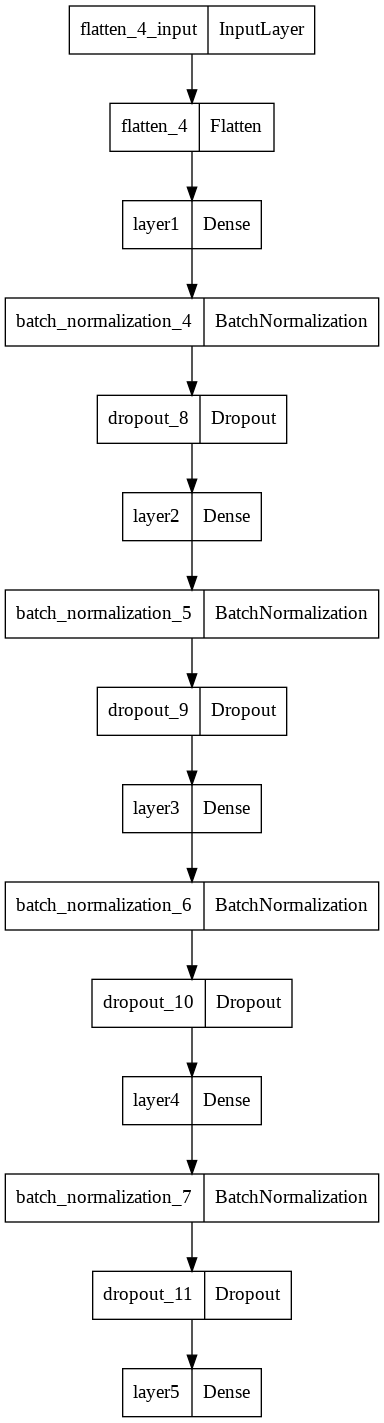

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
model.get_layer('layer1').get_weights()

[array([[-0.04366632, -0.04178973,  0.00021166, ..., -0.0001461 ,
          0.05837312, -0.0625722 ],
        [-0.06358475, -0.0302209 ,  0.0470783 , ..., -0.04249664,
         -0.04986394,  0.02175522],
        [ 0.05833363,  0.01586418, -0.03941449, ...,  0.03240208,
          0.05042698, -0.01179145],
        ...,
        [-0.03078948,  0.02237126,  0.05980974, ...,  0.01950555,
          0.02600847, -0.00815407],
        [ 0.0274588 , -0.06991846, -0.0003473 , ...,  0.0147931 ,
         -0.02437985, -0.02984271],
        [ 0.0575492 ,  0.00281986, -0.00126031, ..., -0.07013717,
         -0.02331154, -0.00446218]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
tf.random.set_seed(300)
model.compile(loss='categorical_crossentropy',metrics='Accuracy',optimizer='SGD')



In [ ]:
tf.random.set_seed(300)
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,min_delta=0.001)
hestory=model.fit(
    x=x_ntrain,
    y=y_ntrain_hot,
    batch_size=80,
    epochs=60,
    verbose=1,
    validation_data=(x_valid,y_valid_hot),
    shuffle=True,
    callbacks=[callback]
)


Epoch 1/60
600/600 [==============================] - 4s 6ms/step - loss: 0.6522 - Accuracy: 0.7756 - val_loss: 0.4266 - val_Accuracy: 0.8432
Epoch 2/60
600/600 [==============================] - 3s 5ms/step - loss: 0.4697 - Accuracy: 0.8312 - val_loss: 0.3761 - val_Accuracy: 0.8626
Epoch 3/60
600/600 [==============================] - 3s 5ms/step - loss: 0.4230 - Accuracy: 0.8494 - val_loss: 0.3590 - val_Accuracy: 0.8697
Epoch 4/60
600/600 [==============================] - 3s 5ms/step - loss: 0.3890 - Accuracy: 0.8577 - val_loss: 0.3332 - val_Accuracy: 0.8794
Epoch 5/60
600/600 [==============================] - 3s 5ms/step - loss: 0.3740 - Accuracy: 0.8641 - val_loss: 0.3267 - val_Accuracy: 0.8810
Epoch 6/60
600/600 [==============================] - 3s 5ms/step - loss: 0.3522 - Accuracy: 0.8710 - val_loss: 0.3247 - val_Accuracy: 0.8802
Epoch 7/60
600/600 [==============================] - 3s 5ms/step - loss: 0.3391 - Accuracy: 0.8760 - val_loss: 0.3194 - val_Accuracy: 0.8841
Epoch 

In [ ]:
type(hestory.history)

dict

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(hestory.history)

,loss,Accuracy,val_loss,val_Accuracy
0,0.652162,0.775563,0.426642,0.843167
1,0.469707,0.831229,0.376104,0.862583
2,0.423027,0.849417,0.359046,0.869667
3,0.389044,0.857708,0.333231,0.879417
4,0.374025,0.864146,0.326722,0.881000
5,0.352175,0.871042,0.324720,0.880250
6,0.339052,0.875958,0.319415,0.884083
7,0.330116,0.878271,0.318385,0.886333
8,0.317771,0.883792,0.311396,0.885833
9,0.308682,0.885917,0.305131,0.889250


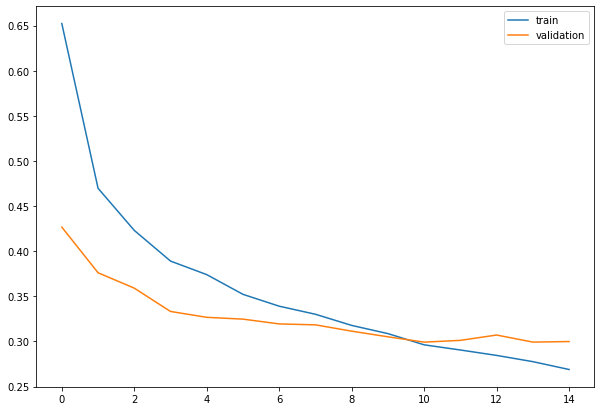

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(hestory.history['loss'])
plt.plot(hestory.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [ ]:
model.predict(x_test[0]).round(2).argmax(axis=-1)

1/1 [==============================] - 0s 17ms/step


array([9])

In [ ]:
prediction=model.predict(x_test).argmax(axis=-1)
print(prediction)

313/313 [==============================] - 1s 3ms/step
[9 2 1 ... 8 1 5]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.83      0.80      1000
           3       0.88      0.90      0.89      1000
           4       0.80      0.78      0.79      1000
           5       0.98      0.95      0.97      1000
           6       0.75      0.63      0.68      1000
           7       0.92      0.97      0.95      1000
           8       0.96      0.97      0.96      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
model.save('my_frist model.h5')

In [ ]:
saved_model=keras.models.load_model('my_frist model.h5')

In [ ]:
saved_model.predict(np.expand_dims(x_test[0],axis=0))

1/1 [==============================] - 0s 110ms/step


array([[2.08534038e-06, 4.00678327e-05, 2.36259007e-06, 3.49079128e-05,
        1.30721655e-05, 6.50490168e-04, 3.27833027e-06, 4.15958092e-03,
        9.41109374e-06, 9.95084822e-01]], dtype=float32)